In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from itertools import product

## CV核心基础WEEK3 ：经典机器学习（一）
### Pipeline:
1. 监督学习与非监督学习
2. 第一个可训练的监督学习模型：线性回归模型的3类解法
3. 使用线性模型，解决字符分类问题
4. 逻辑回归模型

### 作业：
* 编写计算机视觉的第1版程序：用线性回归模型，解决数字图片分类问题，
* 要求：用pytorch 的auto_grad功能。

#### 步骤：
1. 生成10张图片，对应0,1,2,3,4,5,6,7,8,9.
2. 对这10张图片提取特征x。
3. 用一个线性判别器f(x)来决策输出结果y。
4. 判别器的训练要使用梯度下降法，写代码的时候要用到pytorch 的auto_grad功能。
  
  

#### 达到作用：
* 当x是 “0”图片对应的特征时，y=f(x)=0
...
* 当x是 “9”图片对应的特征时，y=f(x)=9
___ 

_可参考代码：_
- /week3/recognize_computer_vision_linear_model.py,线性模型解决图片识别问题课程代码
- /week3/how_to_use_auto_grad.py,测试pytorch auto_grad使用方法
- /week3/data_display.ipynb 数据显示
- /week3/week2作业答案课堂讲解.ipynb
- /week3/auto_grad使用时的注意事项.ipynb
- /week3/auto_grad形式的梯度下降.ipynb
- /week3/running_jupyter.pdf , jupyter运行命令
- jupyter常用效率快捷键：https://zhuanlan.zhihu.com/p/143919082


In [4]:
def generate_data():
    # 本函数生成0-9，10个数字的图片矩阵
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    image_label=[0,1,2,3,4,5,6,7,8,9]
    return image_data,image_label

In [5]:
def get_feature(x):
    return x.flatten().view(1,36).float()

In [6]:
def model(feature, weights):
    y = -1
    feature = torch.cat((feature, torch.tensor(1.0).view(1,1)), 1) # 连接两个张量，最后一个参数为1，代表列上叠加，为0，代表行上叠加
    y = torch.mm(feature, weights)
    return y

In [7]:
loss_fn = torch.nn.MSELoss() # 损失函数MSE

In [10]:
'''
对每幅图像做自动求导
'''
def linearRegression(image_data, image_labels, weights):
    epochs = 1000
    loss_all = []
    for epoch in range(epochs):
        loss = 0
        for i in range(0, 10):
            feature = get_feature(image_data[i])
            y = model(feature, weights)
            label = torch.tensor(image_labels[i]).view(1,1).float()
            loss += loss_fn(y, label)
        loss /= 10.    
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * 0.005
            weights.grad.zero_()
        
        print("epoch=%s,loss=%s,weights=%s"%(epoch,loss,weights.view(37)))
        loss_all.append(loss)
        loss = 0
    return weights, loss_all

数字0对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
数字8对应的图片是:
tensor([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]])
--------------------
epoch=0,loss=tensor(65.1604, grad_fn=<DivBackward0>),weights=tensor([-1.5114, -0.6505, -0.6353,  0.0862, -0.3542, -0.7436, -2.0511, -0.5835,
        -0.0599, -0.1901, -0.6562,  0.8482, -0.7189, -0.2009, -1.7581,  0.4659,
        -0.3207,  1.1732,  0.6065, -1.0585, -0.2983, -1.2161,  0.6668,  1.3448,
        -0.3724, -0.6991, -0.6586,  0.9683, -1.0743,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  0.7642], grad_fn=<ViewBackward>)
epoch=1,loss=tensor(57.7921, grad_fn=<DivBackward0>),weights=tensor([-1.5114, -0.6351, -0.5784,  0.1450, -0.3244, -0.7436, -2.0511, -0.5385

        -0.7644, -1.6749, -0.1808, -1.0580,  1.6914], grad_fn=<ViewBackward>)
epoch=85,loss=tensor(5.7561, grad_fn=<DivBackward0>),weights=tensor([-1.5114, -0.2540,  0.1959,  0.7905,  0.6499, -0.7436, -2.0511,  0.1186,
        -0.1867, -0.0943,  0.1200,  0.8482, -0.7189, -0.2501, -0.5809,  1.4971,
         0.0809,  1.1732,  0.6065, -0.1825, -0.1480, -0.8447,  1.5172,  1.5673,
        -0.3724, -0.6505, -0.7358,  1.1667, -0.5450,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.6911], grad_fn=<ViewBackward>)
epoch=86,loss=tensor(5.7179, grad_fn=<DivBackward0>),weights=tensor([-1.5114, -0.2515,  0.1965,  0.7894,  0.6563, -0.7436, -2.0511,  0.1199,
        -0.1885, -0.0953,  0.1201,  0.8482, -0.7189, -0.2533, -0.5755,  1.5005,
         0.0808,  1.1732,  0.6065, -0.1794, -0.1487, -0.8437,  1.5181,  1.5681,
        -0.3724, -0.6515, -0.7425,  1.1620, -0.5438,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.6907], grad_fn=<ViewBackward>)
epoc

        -0.7644, -1.6749, -0.1808, -1.0580,  1.6458], grad_fn=<ViewBackward>)
epoch=174,loss=tensor(3.4940, grad_fn=<DivBackward0>),weights=tensor([-1.5114, -0.0508,  0.2462,  0.7210,  1.0844, -0.7436, -2.0511,  0.2444,
        -0.3065, -0.1905,  0.0690,  0.8482, -0.7189, -0.4868, -0.1911,  1.7893,
         0.0024,  1.1732,  0.6065,  0.0207, -0.2298, -0.7894,  1.5453,  1.5910,
        -0.3724, -0.7042, -1.2161,  0.8378, -0.4871,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.6453], grad_fn=<ViewBackward>)
epoch=175,loss=tensor(3.4772, grad_fn=<DivBackward0>),weights=tensor([-1.5114e+00, -4.8729e-02,  2.4671e-01,  7.2056e-01,  1.0881e+00,
        -7.4364e-01, -2.0511e+00,  2.4596e-01, -3.0754e-01, -1.9154e-01,
         6.7959e-02,  8.4824e-01, -7.1888e-01, -4.8893e-01, -1.8756e-01,
         1.7924e+00,  1.0178e-03,  1.1732e+00,  6.0655e-01,  2.2456e-02,
        -2.3083e-01, -7.8907e-01,  1.5452e+00,  1.5909e+00, -3.7239e-01,
        -7.0447e-01, -1.2203e+00,  

epoch=261,loss=tensor(2.3948, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.1101,  0.2838,  0.6915,  1.3427, -0.7436, -2.0511,  0.3788,
        -0.3737, -0.2747, -0.0335,  0.8482, -0.7189, -0.6483,  0.0690,  2.0443,
        -0.1332,  1.1732,  0.6065,  0.1509, -0.3111, -0.7643,  1.5208,  1.5740,
        -0.3724, -0.7170, -1.5210,  0.6422, -0.4697,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5987], grad_fn=<ViewBackward>)
epoch=262,loss=tensor(2.3854, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.1117,  0.2842,  0.6912,  1.3451, -0.7436, -2.0511,  0.3804,
        -0.3743, -0.2755, -0.0347,  0.8482, -0.7189, -0.6499,  0.0715,  2.0470,
        -0.1349,  1.1732,  0.6065,  0.1522, -0.3120, -0.7640,  1.5204,  1.5737,
        -0.3724, -0.7170, -1.5239,  0.6404, -0.4695,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5982], grad_fn=<ViewBackward>)
epoch=263,loss=tensor(2.3760, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  

epoch=345,loss=tensor(1.7648, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.2317,  0.3048,  0.6755,  1.5091, -0.7436, -2.0511,  0.5071,
        -0.4107, -0.3352, -0.1400,  0.8482, -0.7189, -0.7673,  0.2498,  2.2513,
        -0.2700,  1.1732,  0.6065,  0.2549, -0.3754, -0.7445,  1.4787,  1.5504,
        -0.3724, -0.7163, -1.7269,  0.5165, -0.4611,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5591], grad_fn=<ViewBackward>)
epoch=346,loss=tensor(1.7589, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.2329,  0.3049,  0.6753,  1.5108, -0.7436, -2.0511,  0.5086,
        -0.4110, -0.3358, -0.1413,  0.8482, -0.7189, -0.7686,  0.2517,  2.2535,
        -0.2716,  1.1732,  0.6065,  0.2560, -0.3761, -0.7443,  1.4781,  1.5501,
        -0.3724, -0.7162, -1.7290,  0.5153, -0.4610,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5587], grad_fn=<ViewBackward>)
epoch=347,loss=tensor(1.7530, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  

        -0.7644, -1.6749, -0.1808, -1.0580,  1.5235], grad_fn=<ViewBackward>)
epoch=435,loss=tensor(1.3350, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.3324,  0.3129,  0.6622,  1.6335, -0.7436, -2.0511,  0.6380,
        -0.4321, -0.3794, -0.2467,  0.8482, -0.7189, -0.8693,  0.3921,  2.4321,
        -0.4062,  1.1732,  0.6065,  0.3581, -0.4274, -0.7222,  1.4268,  1.5277,
        -0.3724, -0.7113, -1.8874,  0.4226, -0.4539,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5231], grad_fn=<ViewBackward>)
epoch=436,loss=tensor(1.3312, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.3333,  0.3129,  0.6620,  1.6347, -0.7436, -2.0511,  0.6394,
        -0.4323, -0.3798, -0.2479,  0.8482, -0.7189, -0.8703,  0.3934,  2.4339,
        -0.4077,  1.1732,  0.6065,  0.3593, -0.4279, -0.7220,  1.4263,  1.5274,
        -0.3724, -0.7113, -1.8889,  0.4217, -0.4538,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.5227], grad_fn=<ViewBackward>)
ep

epoch=522,loss=tensor(1.0587, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.4077,  0.3107,  0.6498,  1.7194, -0.7436, -2.0511,  0.7569,
        -0.4422, -0.4067, -0.3375,  0.8482, -0.7189, -0.9506,  0.4937,  2.5723,
        -0.5238,  1.1732,  0.6065,  0.4545, -0.4638, -0.6987,  1.3758,  1.5105,
        -0.3724, -0.7060, -2.0029,  0.3580, -0.4482,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4936], grad_fn=<ViewBackward>)
epoch=523,loss=tensor(1.0560, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.4085,  0.3106,  0.6497,  1.7203, -0.7436, -2.0511,  0.7582,
        -0.4423, -0.4069, -0.3385,  0.8482, -0.7189, -0.9514,  0.4947,  2.5738,
        -0.5251,  1.1732,  0.6065,  0.4556, -0.4641, -0.6984,  1.3753,  1.5103,
        -0.3724, -0.7060, -2.0040,  0.3573, -0.4481,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4933], grad_fn=<ViewBackward>)
epoch=524,loss=tensor(1.0534, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  

        -0.7644, -1.6749, -0.1808, -1.0580,  1.4677], grad_fn=<ViewBackward>)
epoch=612,loss=tensor(0.8593, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.4693,  0.3015,  0.6365,  1.7842, -0.7436, -2.0511,  0.8714,
        -0.4464, -0.4236, -0.4177,  0.8482, -0.7189, -1.0217,  0.5720,  2.6884,
        -0.6313,  1.1732,  0.6065,  0.5514, -0.4904, -0.6728,  1.3247,  1.4977,
        -0.3724, -0.7013, -2.0938,  0.3099, -0.4443,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4674], grad_fn=<ViewBackward>)
epoch=613,loss=tensor(0.8574, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.4699,  0.3014,  0.6364,  1.7848, -0.7436, -2.0511,  0.8726,
        -0.4464, -0.4238, -0.4186,  0.8482, -0.7189, -1.0225,  0.5727,  2.6895,
        -0.6324,  1.1732,  0.6065,  0.5525, -0.4907, -0.6725,  1.3242,  1.4976,
        -0.3724, -0.7012, -2.0947,  0.3095, -0.4443,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4671], grad_fn=<ViewBackward>)
ep

epoch=701,loss=tensor(0.7165, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5183,  0.2882,  0.6227,  1.8312, -0.7436, -2.0511,  0.9765,
        -0.4469, -0.4327, -0.4842,  0.8482, -0.7189, -1.0825,  0.6295,  2.7799,
        -0.7252,  1.1732,  0.6065,  0.6442, -0.5087, -0.6462,  1.2770,  1.4891,
        -0.3724, -0.6974, -2.1631,  0.2762, -0.4430,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4451], grad_fn=<ViewBackward>)
epoch=702,loss=tensor(0.7152, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5188,  0.2880,  0.6225,  1.8317, -0.7436, -2.0511,  0.9776,
        -0.4469, -0.4327, -0.4849,  0.8482, -0.7189, -1.0831,  0.6301,  2.7808,
        -0.7262,  1.1732,  0.6065,  0.6452, -0.5089, -0.6459,  1.2764,  1.4890,
        -0.3724, -0.6974, -2.1638,  0.2758, -0.4430,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4448], grad_fn=<ViewBackward>)
epoch=703,loss=tensor(0.7138, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  

epoch=790,loss=tensor(0.6091, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5591,  0.2724,  0.6084,  1.8659, -0.7436, -2.0511,  1.0738,
        -0.4454, -0.4365, -0.5392,  0.8482, -0.7189, -1.1361,  0.6724,  2.8531,
        -0.8087,  1.1732,  0.6065,  0.7332, -0.5211, -0.6194,  1.2323,  1.4838,
        -0.3724, -0.6945, -2.2174,  0.2525, -0.4446,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4254], grad_fn=<ViewBackward>)
epoch=791,loss=tensor(0.6081, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5595,  0.2722,  0.6082,  1.8662, -0.7436, -2.0511,  1.0749,
        -0.4454, -0.4365, -0.5398,  0.8482, -0.7189, -1.1367,  0.6728,  2.8539,
        -0.8096,  1.1732,  0.6065,  0.7342, -0.5212, -0.6191,  1.2318,  1.4838,
        -0.3724, -0.6944, -2.2180,  0.2523, -0.4446,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4252], grad_fn=<ViewBackward>)
epoch=792,loss=tensor(0.6070, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  

        -0.7644, -1.6749, -0.1808, -1.0580,  1.4083], grad_fn=<ViewBackward>)
epoch=879,loss=tensor(0.5256, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5939,  0.2552,  0.5938,  1.8916, -0.7436, -2.0511,  1.1639,
        -0.4429, -0.4367, -0.5843,  0.8482, -0.7189, -1.1842,  0.7043,  2.9118,
        -0.8833,  1.1732,  0.6065,  0.8182, -0.5293, -0.5926,  1.1909,  1.4811,
        -0.3724, -0.6921, -2.2605,  0.2365, -0.4489,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4081], grad_fn=<ViewBackward>)
epoch=880,loss=tensor(0.5247, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.5942,  0.2551,  0.5936,  1.8918, -0.7436, -2.0511,  1.1649,
        -0.4428, -0.4367, -0.5848,  0.8482, -0.7189, -1.1847,  0.7046,  2.9124,
        -0.8841,  1.1732,  0.6065,  0.8191, -0.5293, -0.5923,  1.1904,  1.4811,
        -0.3724, -0.6921, -2.2609,  0.2363, -0.4490,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.4079], grad_fn=<ViewBackward>)
ep

        -0.7644, -1.6749, -0.1808, -1.0580,  1.3928], grad_fn=<ViewBackward>)
epoch=967,loss=tensor(0.4595, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.6241,  0.2377,  0.5792,  1.9102, -0.7436, -2.0511,  1.2464,
        -0.4400, -0.4346, -0.6206,  0.8482, -0.7189, -1.2275,  0.7277,  2.9585,
        -0.9498,  1.1732,  0.6065,  0.8979, -0.5344, -0.5666,  1.1530,  1.4803,
        -0.3724, -0.6901, -2.2945,  0.2263, -0.4556,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.3927], grad_fn=<ViewBackward>)
epoch=968,loss=tensor(0.4588, grad_fn=<DivBackward0>),weights=tensor([-1.5114,  0.6245,  0.2375,  0.5790,  1.9104, -0.7436, -2.0511,  1.2473,
        -0.4399, -0.4346, -0.6209,  0.8482, -0.7189, -1.2280,  0.7279,  2.9590,
        -0.9506,  1.1732,  0.6065,  0.8987, -0.5345, -0.5663,  1.1526,  1.4803,
        -0.3724, -0.6901, -2.2949,  0.2263, -0.4557,  0.9397,  1.3913, -0.1332,
        -0.7644, -1.6749, -0.1808, -1.0580,  1.3925], grad_fn=<ViewBackward>)
ep

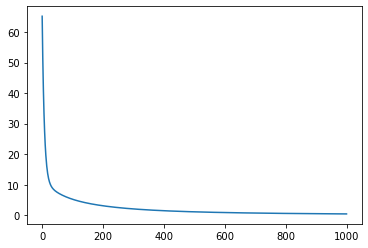

对每张图片进行识别
图像[0]得分类结果是:[tensor([[1]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
         0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])]
图像[1]得分类结果是:[tensor([[1]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])]
图像[2]得分类结果是:[tensor([[2]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.]])]
图像[3]得分类结果是:[tensor([[4]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])]
图像[4]得分类结果是:[tensor([[4]], dtype=torch.int32)],它得特征是[tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 

In [11]:
if __name__ == "__main__":
    weights = torch.randn((37,1), dtype=torch.float32, requires_grad=True)
    image_data, image_label = generate_data()
    
    # 打印出0的图像
    print("数字0对应的图片是:")
    print(image_data[0])
    print("-"*20)
    
    # 打印出8的图像
    print("数字8对应的图片是:")
    print(image_data[8])
    print("-"*20)
    
    # 模型训练
    weights , loss_all = linearRegression(image_data, image_label, weights)
    plt.figure()
    plt.plot(loss_all)
    plt.show()
    print("对每张图片进行识别")
    
    for i in range(0, 10):
        x = image_data[i]
        
        feature = get_feature(x)
        
        y = torch.floor((model(feature, weights) + 0.5)).int()
        print("图像[%s]得分类结果是:[%s],它得特征是[%s]"%(i,y,feature))